In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15,10]

In [20]:
df = pd.read_csv("symbol_snapshot.csv")

In [23]:
def get_by_symbol(df, symbol):
    return df[df.symbol == symbol].iloc[0]

In [24]:
def plot_index_price(symbols):
    p = np.mean(symbols.indexPrice)
    mi, ma = plt.ylim()
    plt.plot([p, p], [mi, ma])

def plot_option_buy_call(d, xs):
    y = xs - d.strikePrice
    y[y <= 0] = 0
    y -= d.ask1
    plt.plot(xs, y, label=d.symbol)
    
def plot_option_sell_call(d, xs):
    y = xs - d.strikePrice
    y[y <= 0] = 0
    y -= d.bid1
    plt.plot(xs, -y, label=d.symbol)
    
def plot_option_buy_put(d, xs):
    y = -(xs - d.strikePrice)
    y[y <= 0] = 0
    y -= d.ask1
    plt.plot(xs, y, label=d.symbol)
        
def plot_option_sell_put(d, xs):
    y = -(xs - d.strikePrice)
    y[y <= 0] = 0
    y -= d.bid1
    plt.plot(xs, -y, label=d.symbol)

In [25]:
def pl_option_buy_call(d, xs):
    y = xs - d.strikePrice
    y[y <= 0] = 0
    y -= d.ask1
    return y
    
def pl_option_sell_call(d, xs):
    y = xs - d.strikePrice
    y[y <= 0] = 0
    y -= d.bid1
    return -y
    
def pl_option_buy_put(d, xs):
    y = -(xs - d.strikePrice)
    y[y <= 0] = 0
    y -= d.ask1
    return y
        
def pl_option_sell_put(d, xs):
    y = -(xs - d.strikePrice)
    y[y <= 0] = 0
    y -= d.bid1
    return -y

def pl_stock_buy(d, xs):
    y = xs - d.indexPrice
    return y

def pl_stock_short(d, xs):
    y = xs - d.indexPrice
    return -y

In [26]:
def cost_option_buy_call(d, xs):
    return - np.ones_like(xs) * d.ask1
    
def cost_option_sell_call(d, xs):
    return np.zeros_like(xs)
    
def cost_option_buy_put(d, xs):
    return - np.ones_like(xs) * d.ask1
        
def cost_option_sell_put(d, xs):
    return np.zeros_like(xs)

def cost_stock_buy(d, xs):
    return - d.indexPrice

def cost_stock_short(d, xs):
    return np.zeros_like(xs)

No handles with labels found to put in legend.


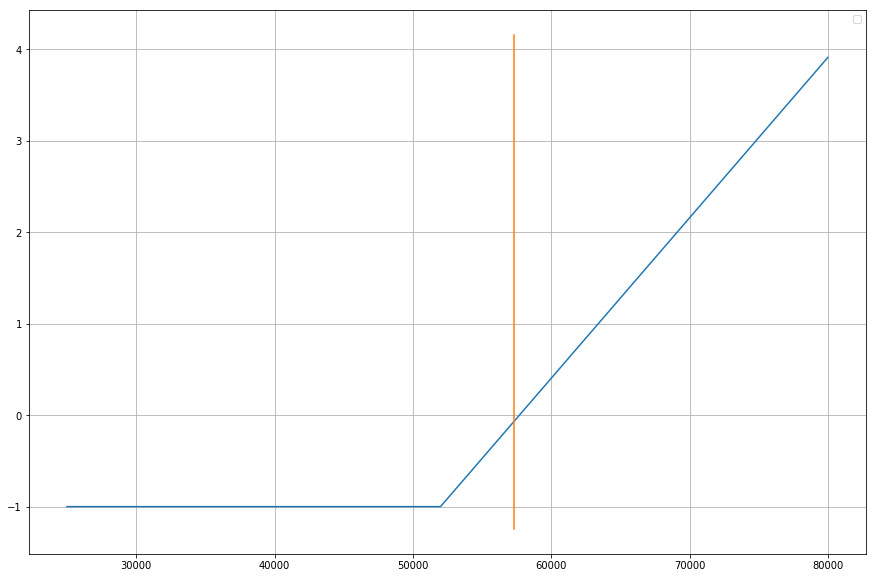

In [42]:
xs = np.linspace(25000, 80000, 1000)

c = cost_option_buy_call(get_by_symbol(df, "BTC-210326-52000-C"), xs)
pl = pl_option_buy_call(get_by_symbol(df, "BTC-210326-52000-C"), xs)

plt.plot(xs, pl / np.abs(c))

plot_index_price(df)
plt.grid()
plt.legend()

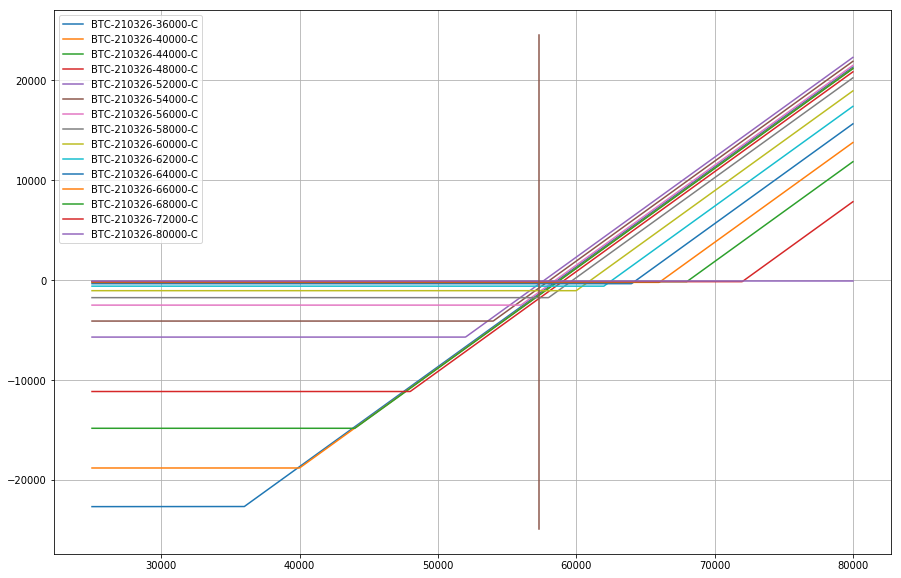

In [28]:
xs = np.linspace(25000, 80000, 1000)

symbols = df[df.optionType == "C"].sort_values("strikePrice")
for i, symbol in symbols.iterrows():
    plot_option_buy_call(symbol, xs)

plot_index_price(symbols)
plt.grid()
plt.legend()

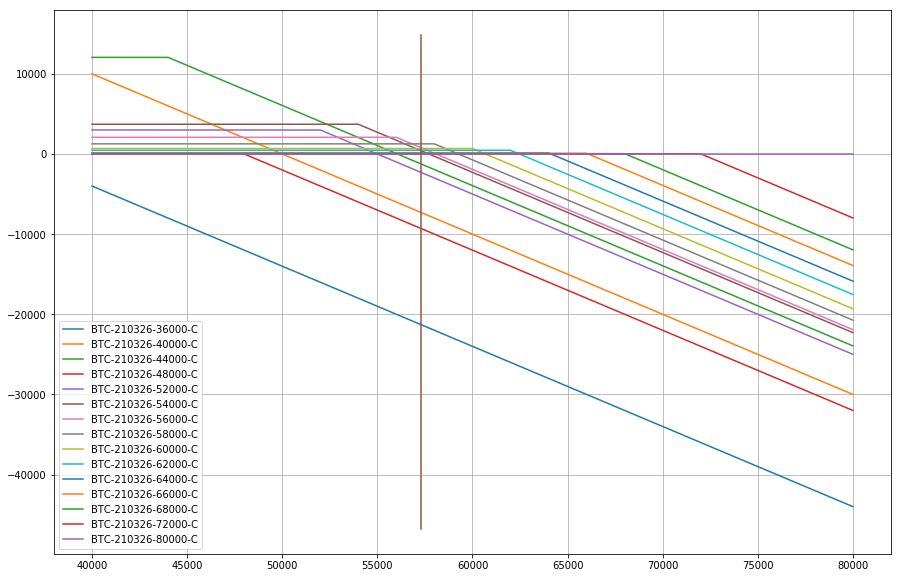

In [29]:
xs = np.linspace(40000, 80000, 1000)

symbols = df[df.optionType == "C"].sort_values("strikePrice")
for i, symbol in symbols.iterrows():
    plot_option_sell_call(symbol, xs)

plot_index_price(symbols)
plt.grid()
plt.legend()

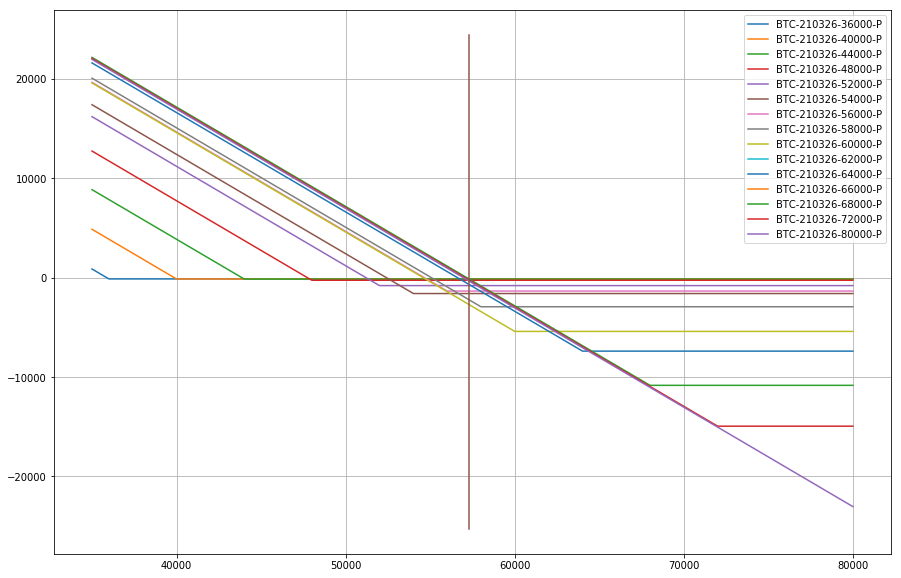

In [30]:
xs = np.linspace(35000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice")
for i, symbol in symbols.iterrows():
    plot_option_buy_put(symbol, xs)

plot_index_price(symbols)
plt.grid()
plt.legend()

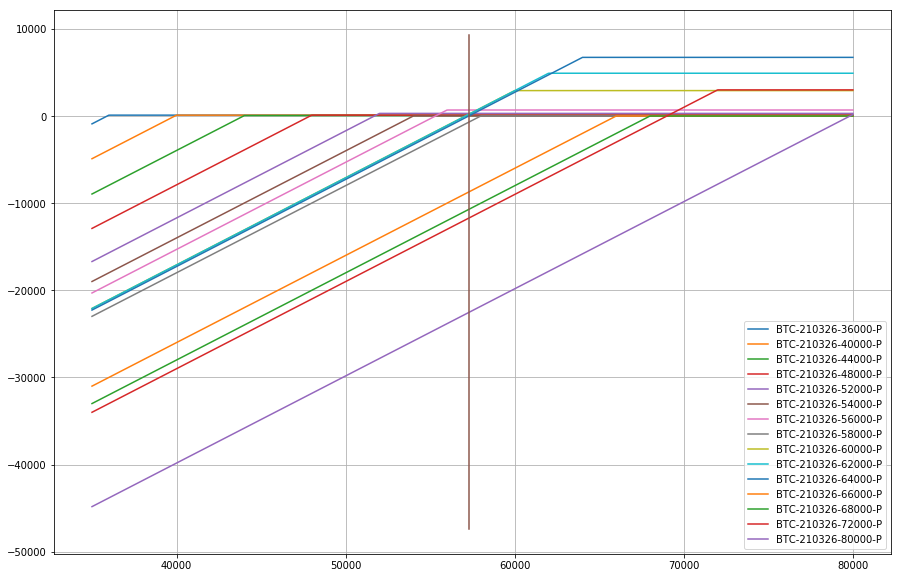

In [31]:
xs = np.linspace(35000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice")
for i, symbol in symbols.iterrows():
    plot_option_sell_put(symbol, xs)

plot_index_price(symbols)
plt.grid()
plt.legend()

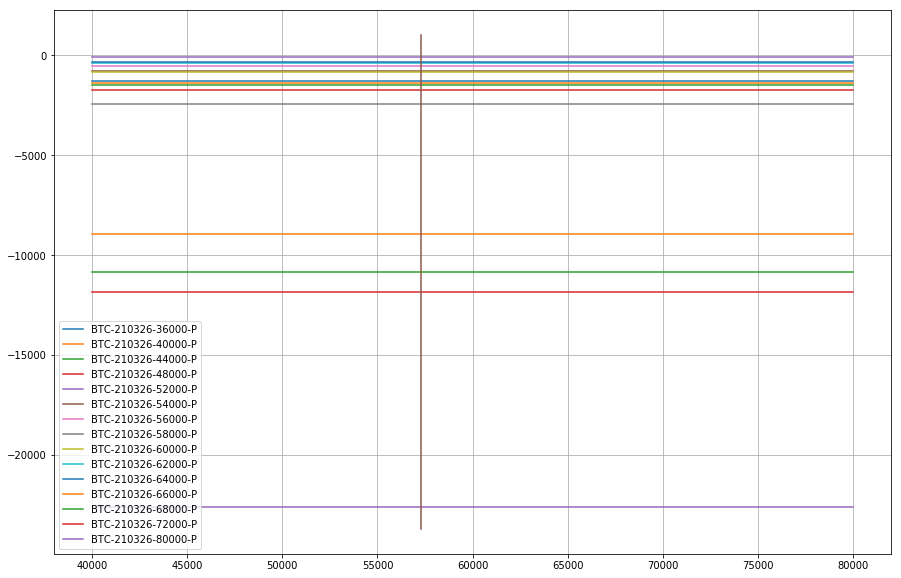

In [32]:
xs = np.linspace(40000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice").symbol
for symbol in symbols:
    s = pl_option_sell_put(get_by_symbol(df, symbol), xs) 
    b = pl_option_buy_call(get_by_symbol(df, symbol[0:-1] + "C"), xs) 
    sho = pl_stock_short(get_by_symbol(df, symbol), xs)
    plt.plot(xs, s+b+sho, label=symbol)

plot_index_price(df)
plt.grid()
plt.legend()

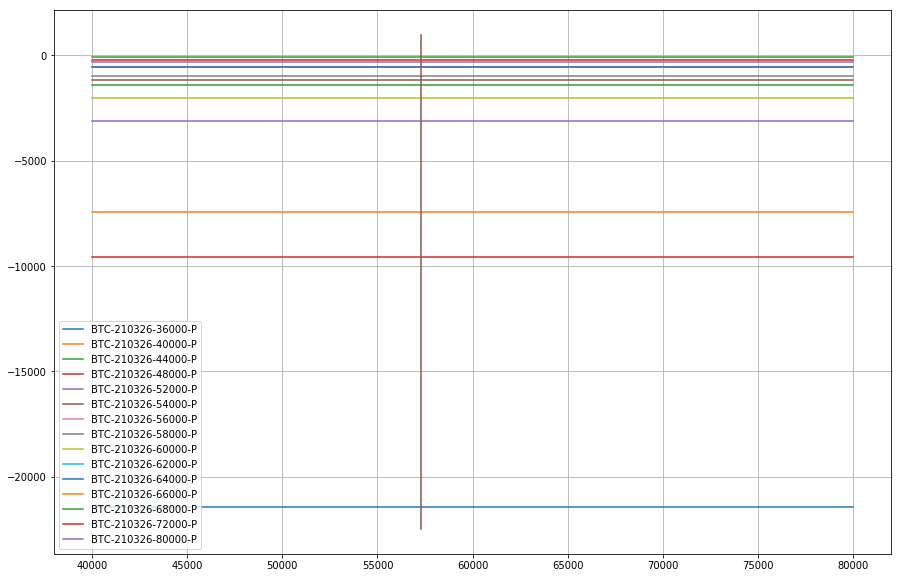

In [33]:
xs = np.linspace(40000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice").symbol
for symbol in symbols:
    s = pl_option_buy_put(get_by_symbol(df, symbol), xs) 
    b = pl_option_sell_call(get_by_symbol(df, symbol[0:-1] + "C"), xs) 
    sto = pl_stock_buy(get_by_symbol(df, symbol), xs)
    plt.plot(xs, s+b+sto, label=symbol)

plot_index_price(df)
plt.grid()
plt.legend()

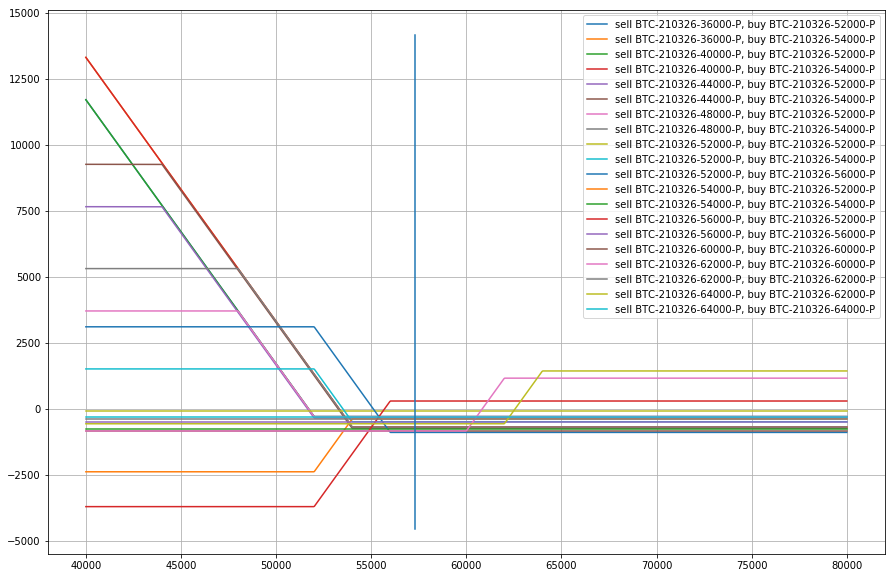

In [34]:
xs = np.linspace(40000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice").symbol
for s_a in symbols:
    for s_b in symbols:
        s = pl_option_sell_put(get_by_symbol(df, s_a), xs)
        b = pl_option_buy_call(get_by_symbol(df, s_b[0:-1] + "C"), xs)
        sto = pl_stock_short(get_by_symbol(df, s_a), xs)
        p_l = s+b+sto
        
        if np.min(p_l[xs > 55000]) >= -1000:
            plt.plot(xs, s+b+sto, label=f"sell {s_a}, buy {s_b}")

plot_index_price(df)
plt.grid()
plt.legend()

/Users/Wattik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


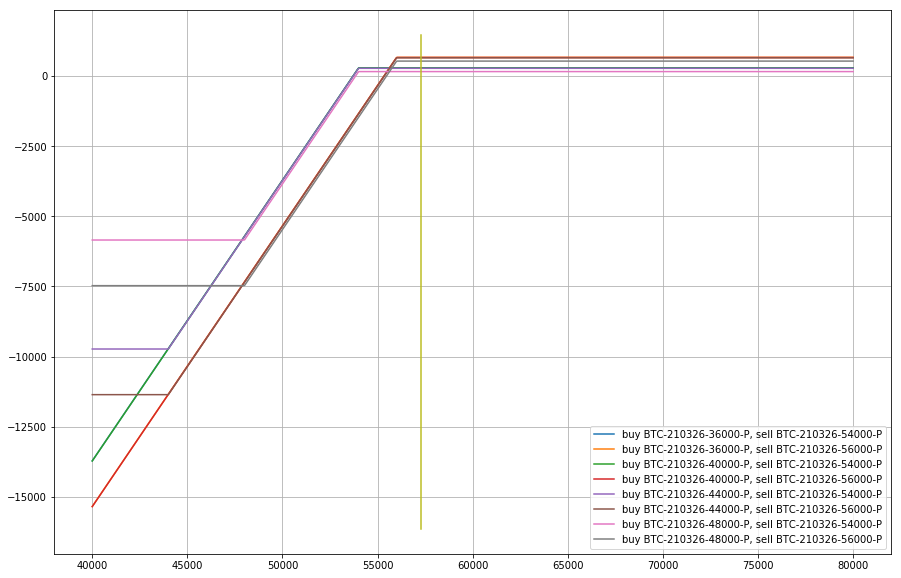

In [35]:
xs = np.linspace(40000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice").symbol
for s_a in symbols:
    for s_b in symbols:
        s = pl_option_buy_put(get_by_symbol(df, s_a), xs)
        b = pl_option_sell_call(get_by_symbol(df, s_b[0:-1] + "C"), xs)
        sto = pl_stock_buy(get_by_symbol(df, s_a), xs)
        p_l = s+b+sto
        
        if (np.min(p_l[xs > 55000]) >= -500) & (np.min(p_l[xs > 60000]) >= 0):
            plt.plot(xs, s+b+sto, label=f"buy {s_a}, sell {s_b}")

plot_index_price(df)
plt.grid()
plt.legend()

/Users/Wattik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


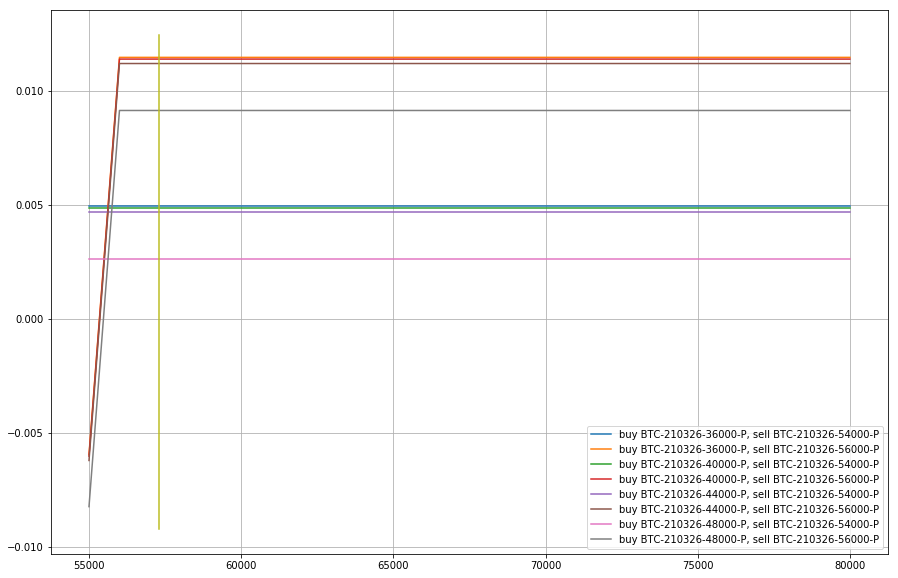

In [43]:
xs = np.linspace(55000, 80000, 1000)

symbols = df[df.optionType == "P"].sort_values("strikePrice").symbol
for s_a in symbols:
    for s_b in symbols:
        b = pl_option_buy_put(get_by_symbol(df, s_a), xs)
        s = pl_option_sell_call(get_by_symbol(df, s_b[0:-1] + "C"), xs)
        sto = pl_stock_buy(get_by_symbol(df, s_a), xs)
        p_l = s+b+sto
        
        b_cost = cost_option_buy_put(get_by_symbol(df, s_a), xs)
        s_cost = cost_option_sell_call(get_by_symbol(df, s_b[0:-1] + "C"), xs)
        sto_cost = cost_stock_buy(get_by_symbol(df, s_a), xs)
        
        cost = b_cost + s_cost + sto_cost
        
        if (np.min(p_l[xs > 55000]) >= -500) & (np.min(p_l[xs > 60000]) >= 0):
            plt.plot(xs, p_l / np.abs(cost), label=f"buy {s_a}, sell {s_b}")

plot_index_price(df)
plt.grid()
plt.legend()